<a href="https://colab.research.google.com/github/GUNTERMAXIMUS/covid-19predictCL/blob/master/covod_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
try:
  %tensorflow_version 2.x
  import tensorflow as tf
  from tensorflow import keras
except OSError:
  print(tf.__version__)
finally:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  print(tf.__version__)
  import requests as rq
  import io
#  from google.colab import drive
#  drive.mount('/content/gdrive', force_remount = True, timeout_ms = 60000)


2.1.0


In [0]:
url = 'https://raw.githubusercontent.com/GUNTERMAXIMUS/covid-19predictCL/master/covid_19_data.csv'
respond = rq.get(url).content

df_data = pd.read_csv(io.StringIO(respond.decode('utf-8')), 
                      sep = ',', 
                      quotechar = '"', 
                      usecols = [1, 3, 5, 6 , 7], 
                      encoding = 'utf-8')

In [9]:
df = df_data[df_data['Country/Region'].str.contains('Chile')]
print(df.isnull().any())
df.head(10)

ObservationDate    False
Country/Region     False
Confirmed          False
Deaths             False
Recovered          False
dtype: bool


,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
3198,03/03/2020,Chile,1.0,0.0,0.0
3357,03/04/2020,Chile,1.0,0.0,0.0
3487,03/05/2020,Chile,4.0,0.0,0.0
3670,03/06/2020,Chile,4.0,0.0,0.0
3875,03/07/2020,Chile,4.0,0.0,0.0
4093,03/08/2020,Chile,8.0,0.0,0.0
4351,03/09/2020,Chile,8.0,0.0,0.0
4612,03/10/2020,Chile,13.0,0.0,0.0
4804,03/11/2020,Chile,23.0,0.0,0.0
5028,03/12/2020,Chile,23.0,0.0,0.0


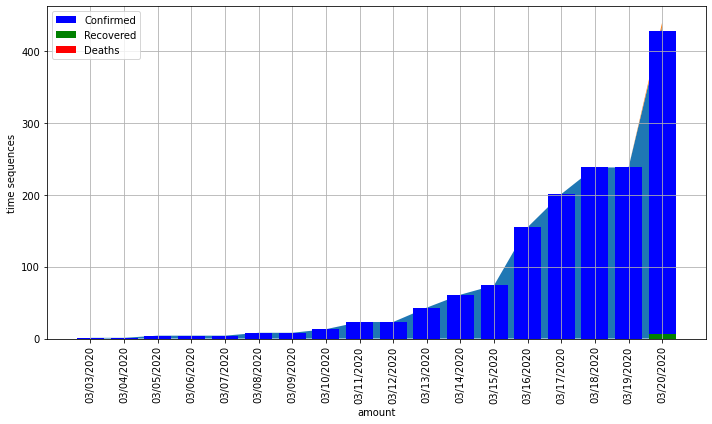

In [10]:
x = df.ObservationDate

plt.figure(figsize = (10, 6))
plt.bar(x, (df.Confirmed) - (df.Recovered + df.Deaths), label = 'Confirmed', color = 'blue')
plt.bar(x, df.Recovered, label = 'Recovered', color = 'green')
plt.bar(x, df.Deaths, label = 'Deaths', color = 'red')
plt.stackplot(x, df.Confirmed, df.Recovered, df.Deaths)
plt.xlabel('amount')
plt.ylabel('time sequences')
plt.legend(loc = 'upper left')
plt.xticks(rotation = 'vertical')
plt.tight_layout()
plt.grid(True)

plt.show()